In [ ]:
!mkdir -p /root/.config/kaggle/
!cp /content/drive/MyDrive/kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

In [ ]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('fedesoriano/body-fat-prediction-dataset', path="/content/drive/MyDrive/ML/Body Fat Estimator", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

In [4]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML/Body Fat Estimator/bodyfat.csv")

In [26]:
# Display the first few rows of the dataset
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [6]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [7]:
# Function to create histograms for feature comparison
def histplots(col):
    plt.figure(figsize=(12,5))
    sns.histplot(df['BodyFat'], color='magenta', label='BodyFat', kde=True)
    sns.histplot(df[col], color='red', label=col, kde=True)
    plt.legend()
    plt.show()

Distribution plots for Density feature is shown below


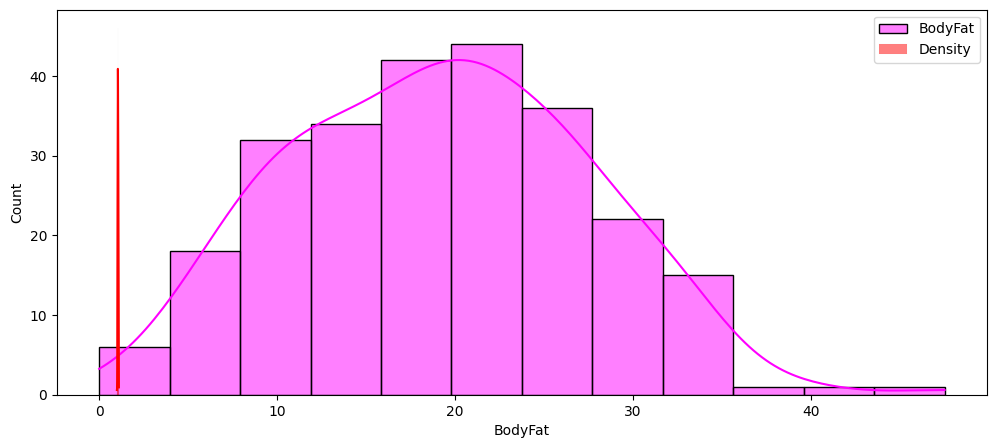

____________________________________________________________________________________________________
Distribution plots for BodyFat feature is shown below


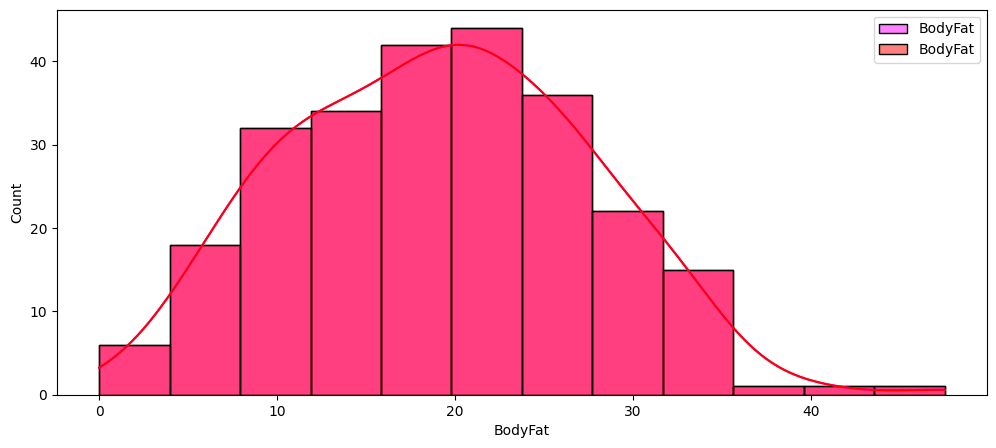

____________________________________________________________________________________________________
Distribution plots for Age feature is shown below


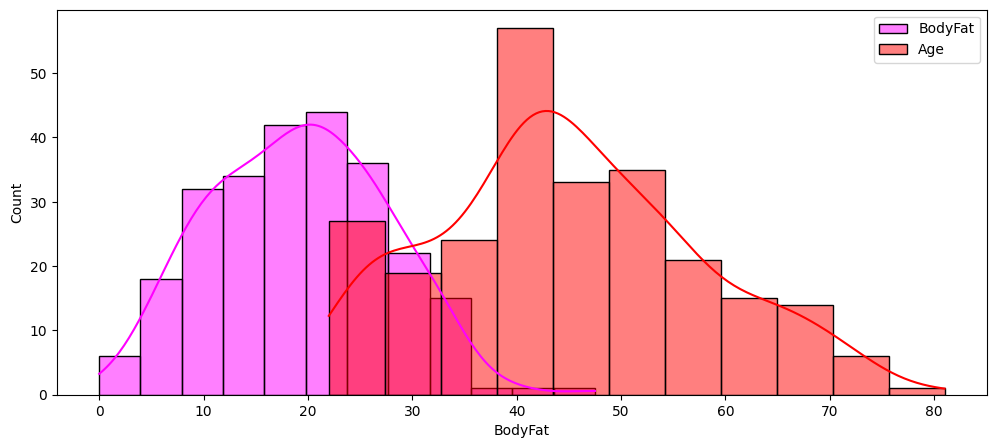

____________________________________________________________________________________________________
Distribution plots for Weight feature is shown below


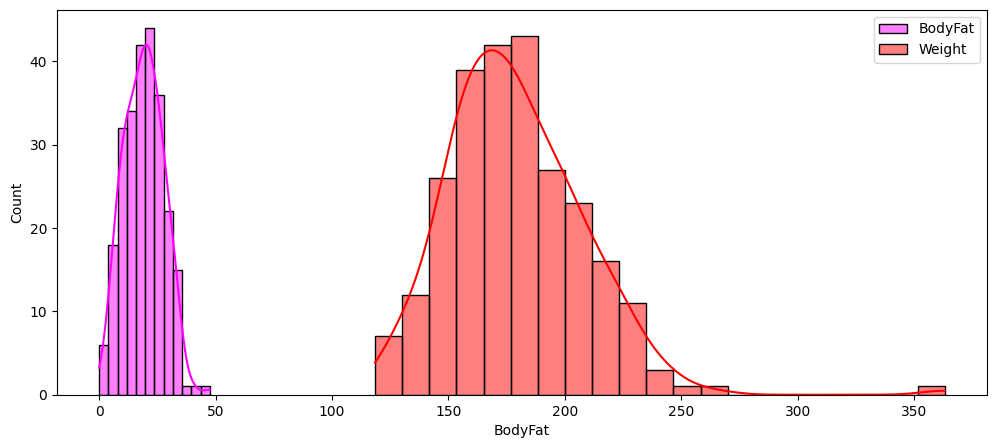

____________________________________________________________________________________________________
Distribution plots for Height feature is shown below


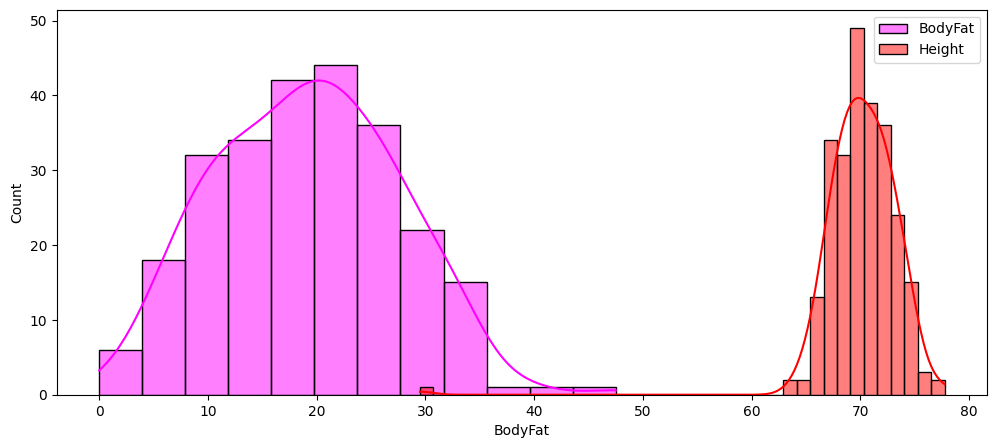

____________________________________________________________________________________________________
Distribution plots for Neck feature is shown below


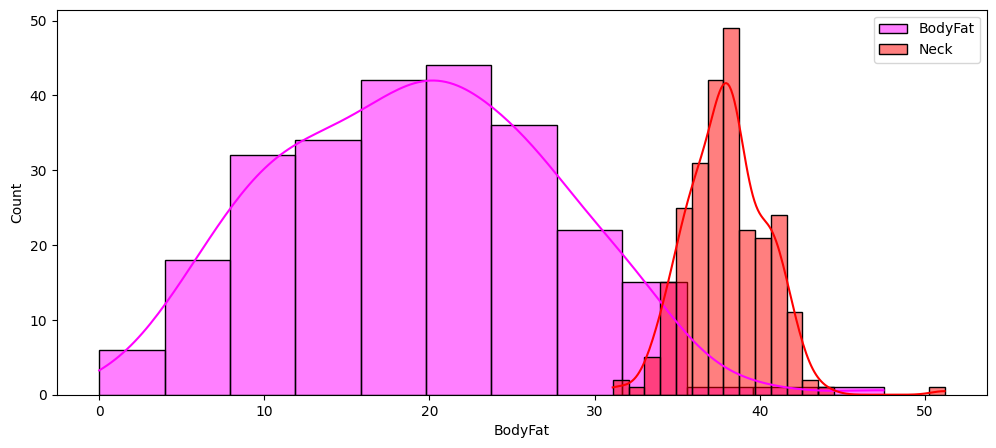

____________________________________________________________________________________________________
Distribution plots for Chest feature is shown below


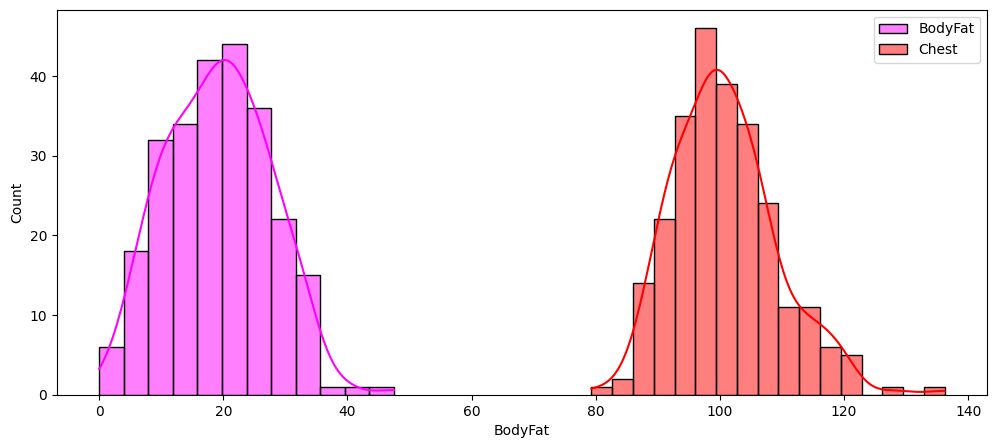

____________________________________________________________________________________________________
Distribution plots for Abdomen feature is shown below


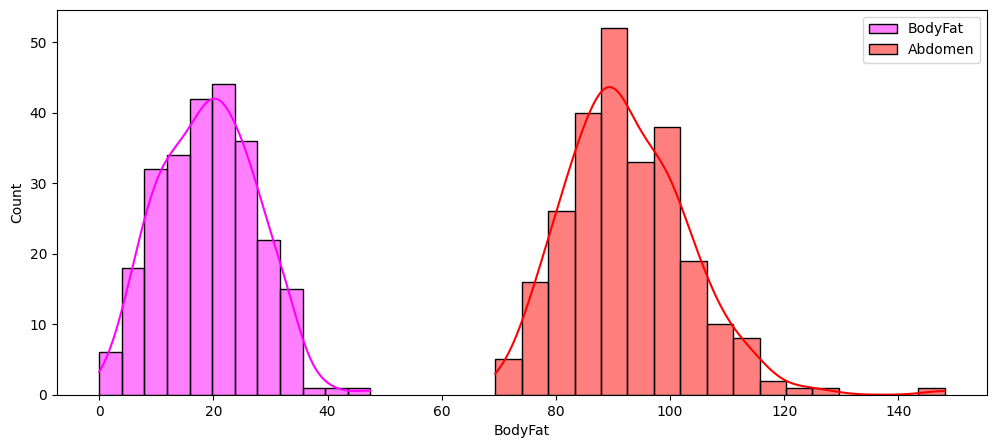

____________________________________________________________________________________________________
Distribution plots for Hip feature is shown below


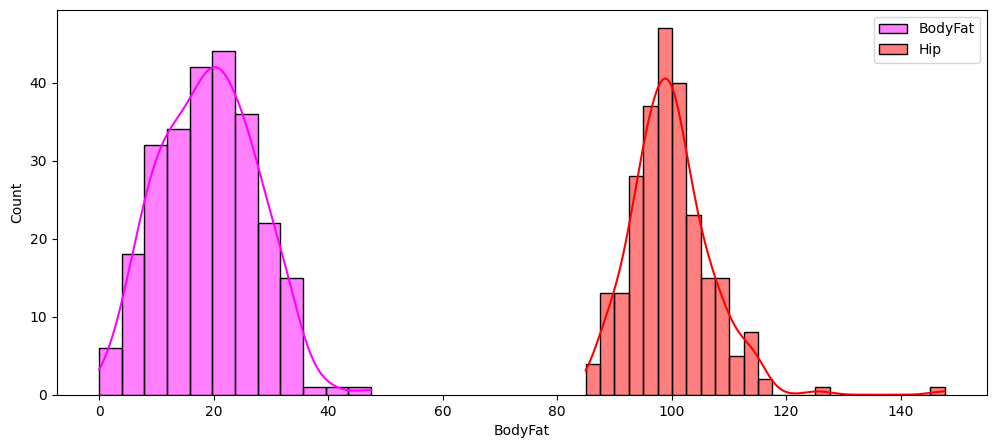

____________________________________________________________________________________________________
Distribution plots for Thigh feature is shown below


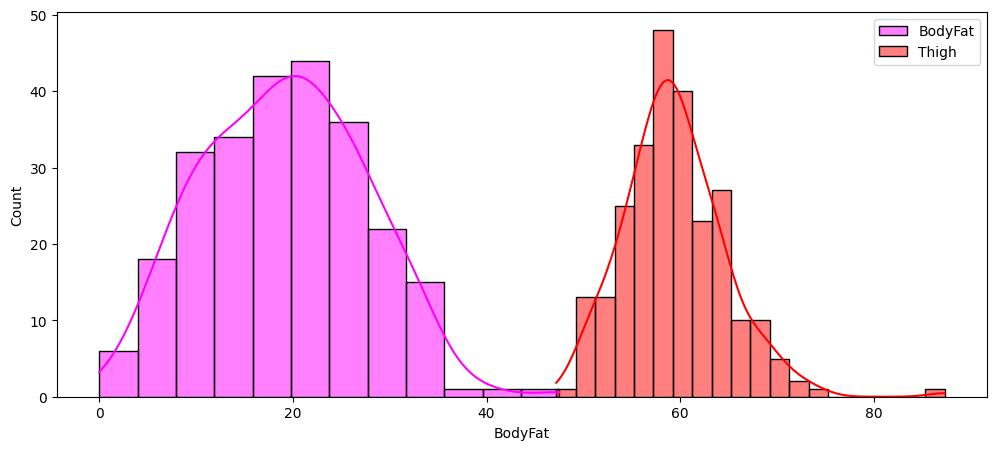

____________________________________________________________________________________________________
Distribution plots for Knee feature is shown below


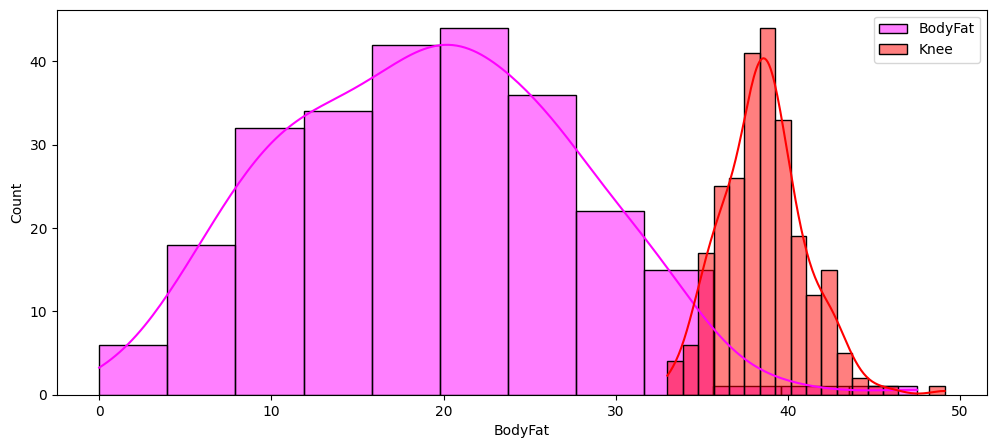

____________________________________________________________________________________________________
Distribution plots for Ankle feature is shown below


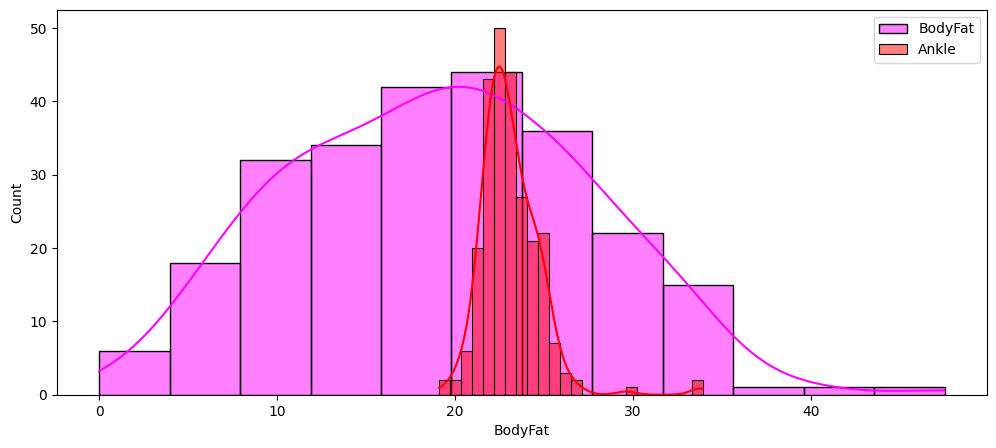

____________________________________________________________________________________________________
Distribution plots for Biceps feature is shown below


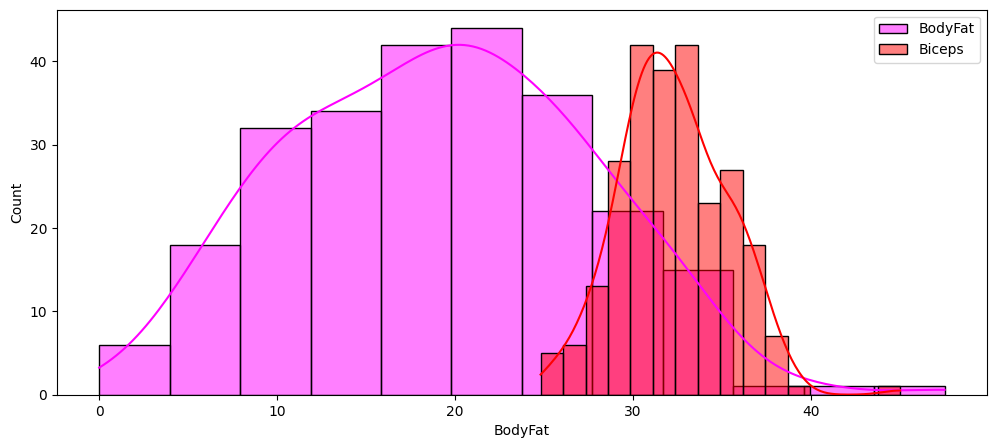

____________________________________________________________________________________________________
Distribution plots for Forearm feature is shown below


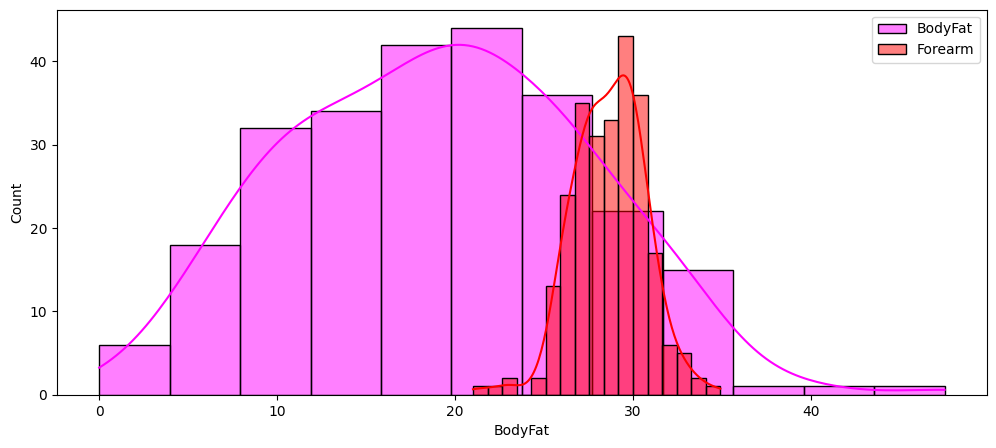

____________________________________________________________________________________________________
Distribution plots for Wrist feature is shown below


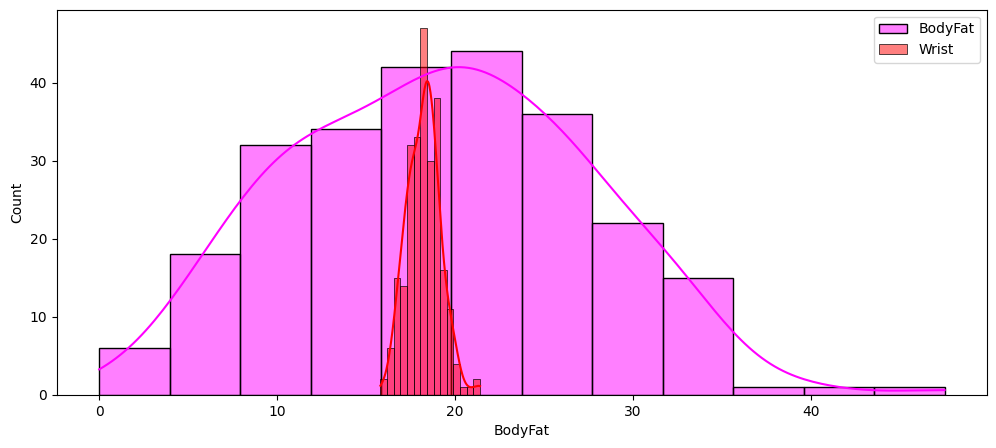

____________________________________________________________________________________________________


In [8]:
# Create histograms for all features
cols = list(df.columns)
for col in cols:
    print(f'Distribution plots for {col} feature is shown below')
    histplots(col)
    print("_"*100)

In [9]:
# Function to create distribution plots
def drawplots(df, col):
    plt.figure(figsize=(15, 7))

    # Histogram
    plt.subplot(1,3,1)
    plt.hist(df[col], color='magenta')
    plt.title("Histogram")

    # Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.title("Q-Q Plot")

    # Box plot
    plt.subplot(1,3,3)
    sns.boxplot(df[col], color='magenta')
    plt.title("Box Plot")

    plt.tight_layout()
    plt.show()

Distribution plots for Density feature is shown below


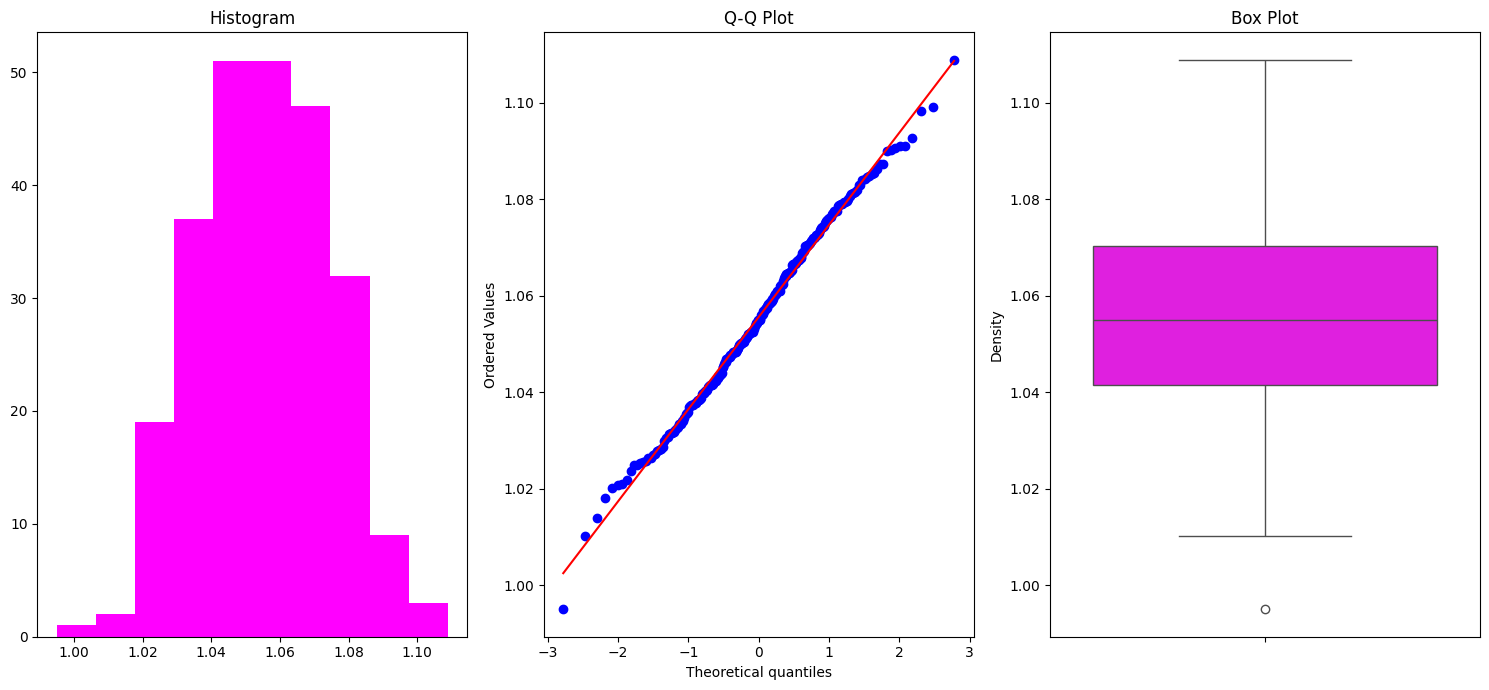

____________________________________________________________________________________________________
Distribution plots for BodyFat feature is shown below


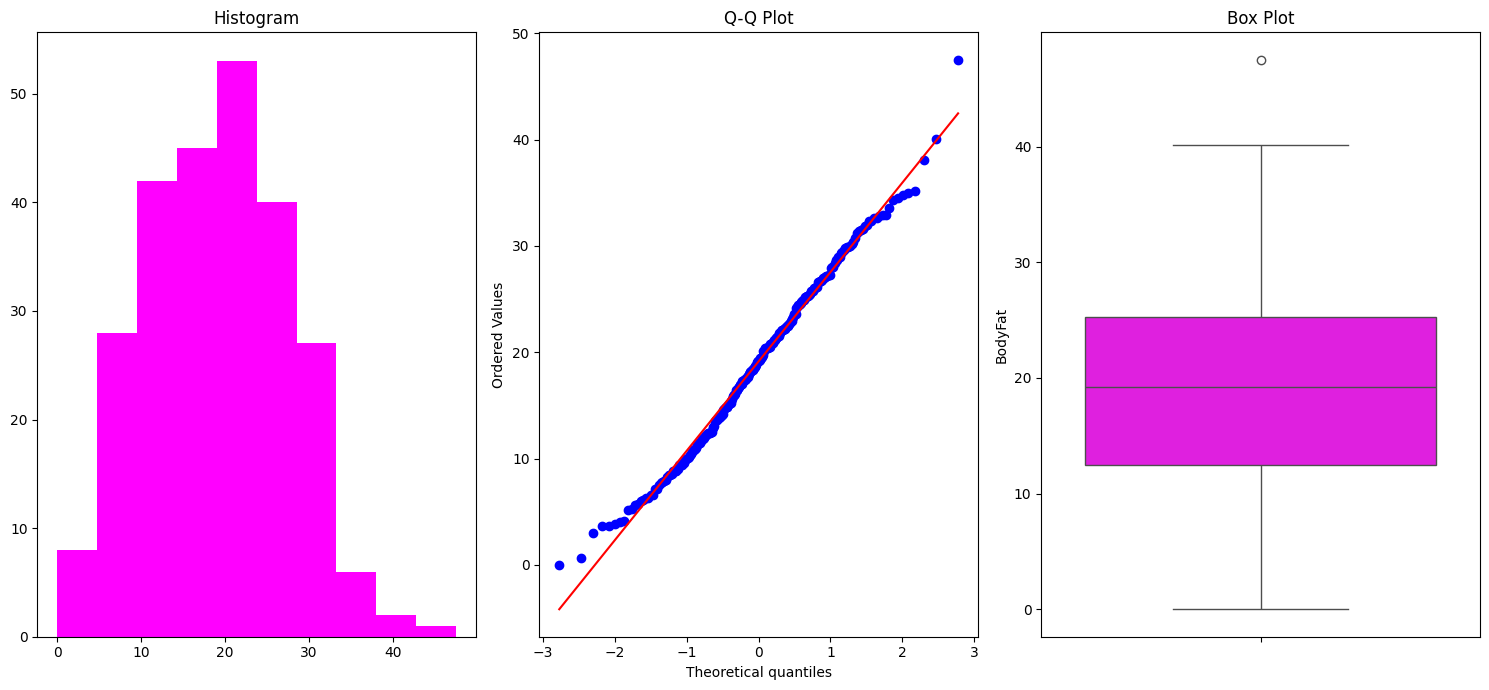

____________________________________________________________________________________________________
Distribution plots for Age feature is shown below


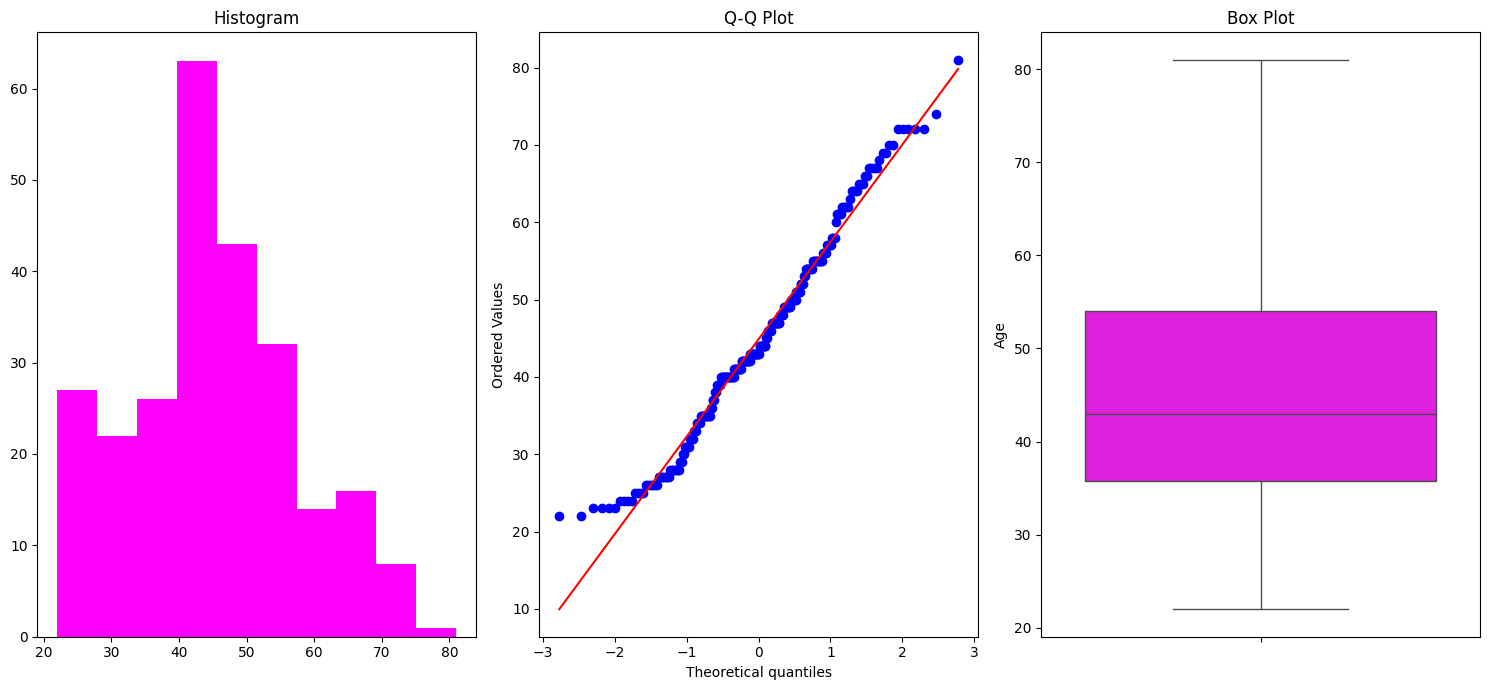

____________________________________________________________________________________________________
Distribution plots for Weight feature is shown below


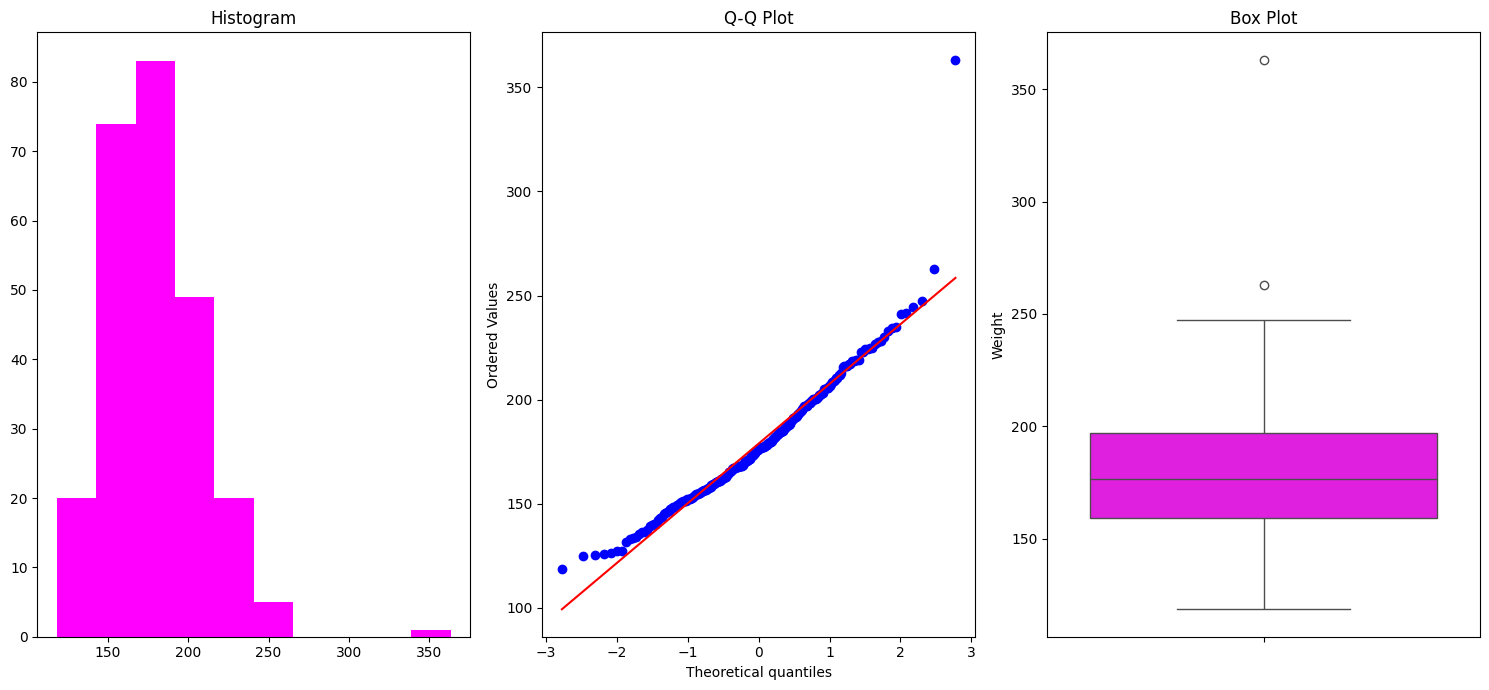

____________________________________________________________________________________________________
Distribution plots for Height feature is shown below


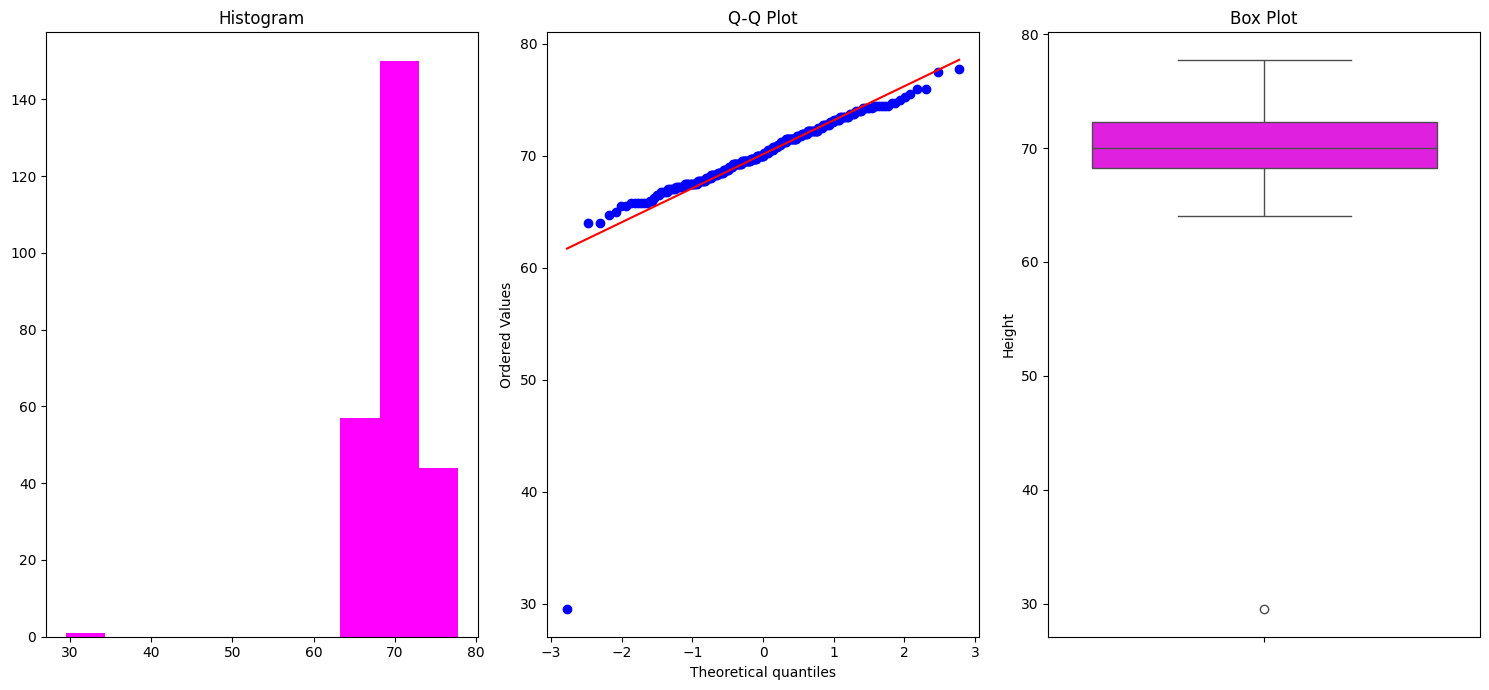

____________________________________________________________________________________________________
Distribution plots for Neck feature is shown below


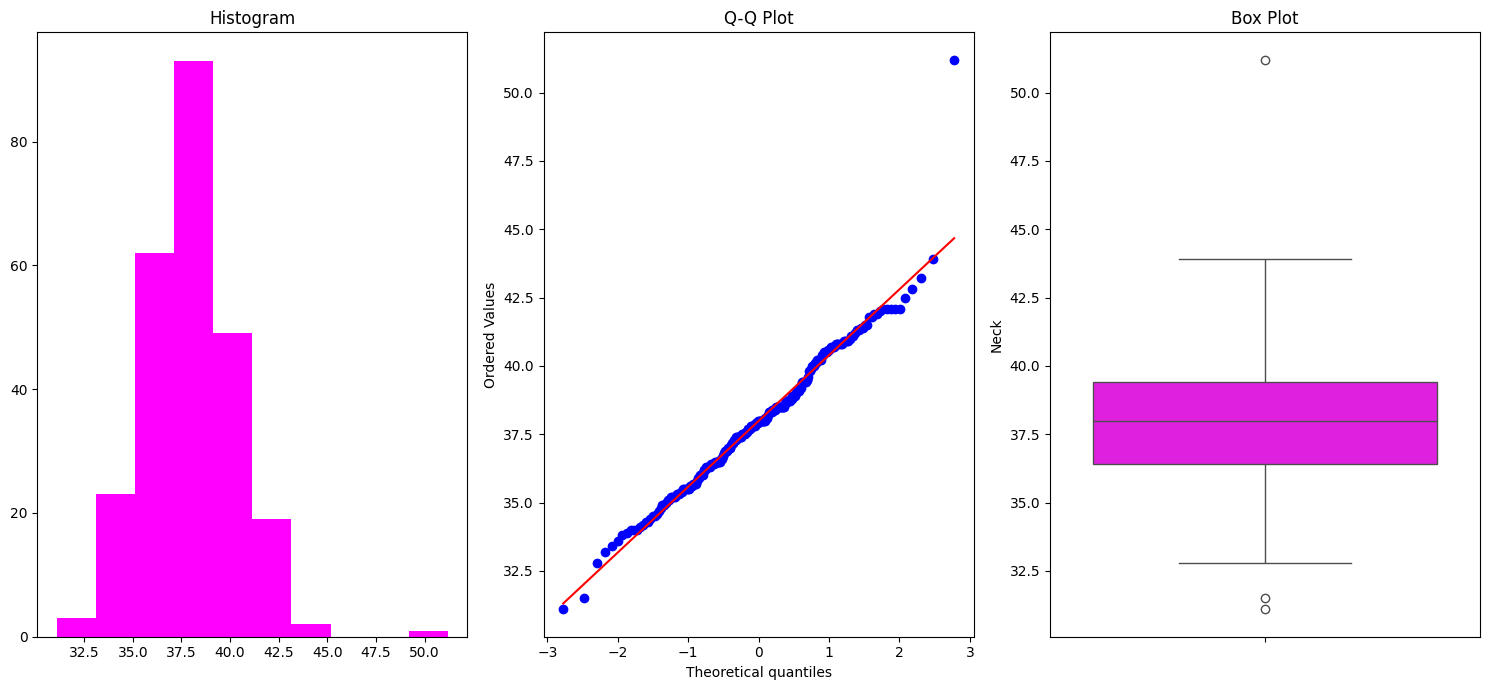

____________________________________________________________________________________________________
Distribution plots for Chest feature is shown below


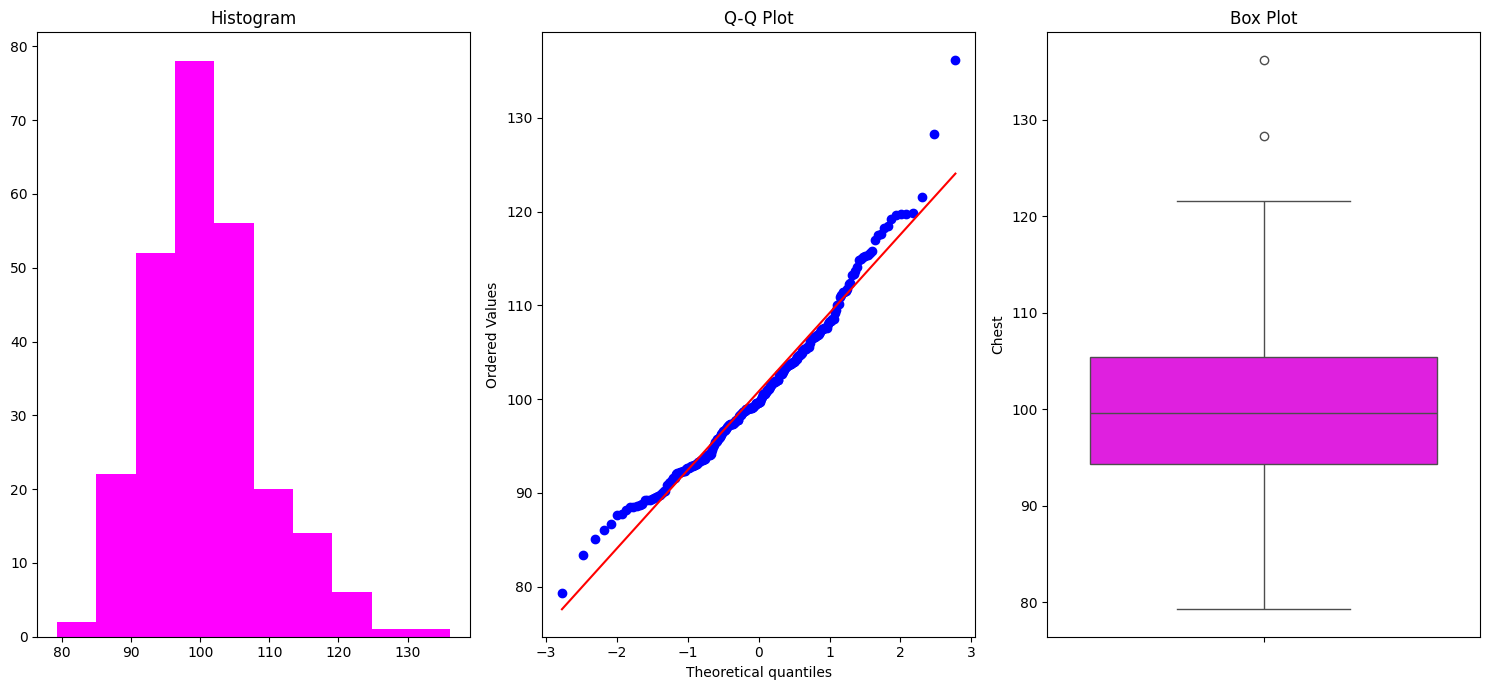

____________________________________________________________________________________________________
Distribution plots for Abdomen feature is shown below


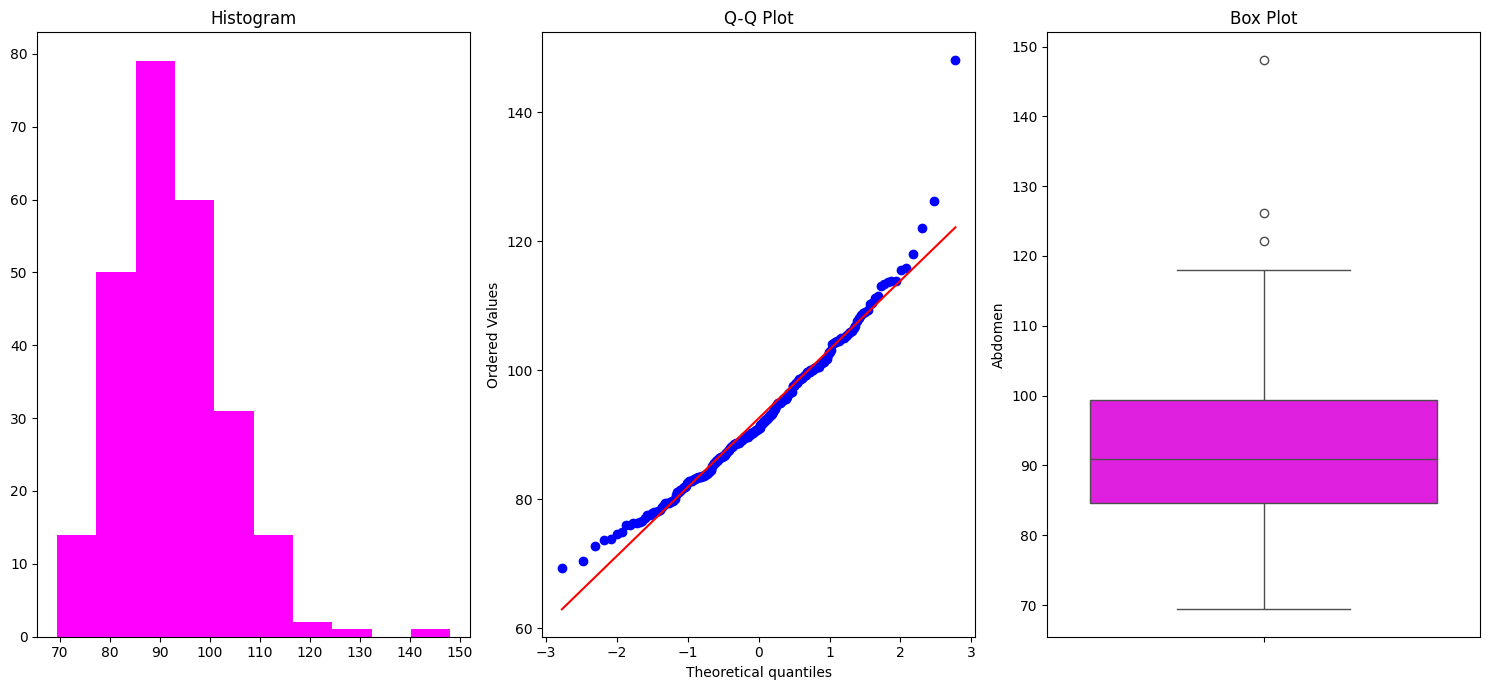

____________________________________________________________________________________________________
Distribution plots for Hip feature is shown below


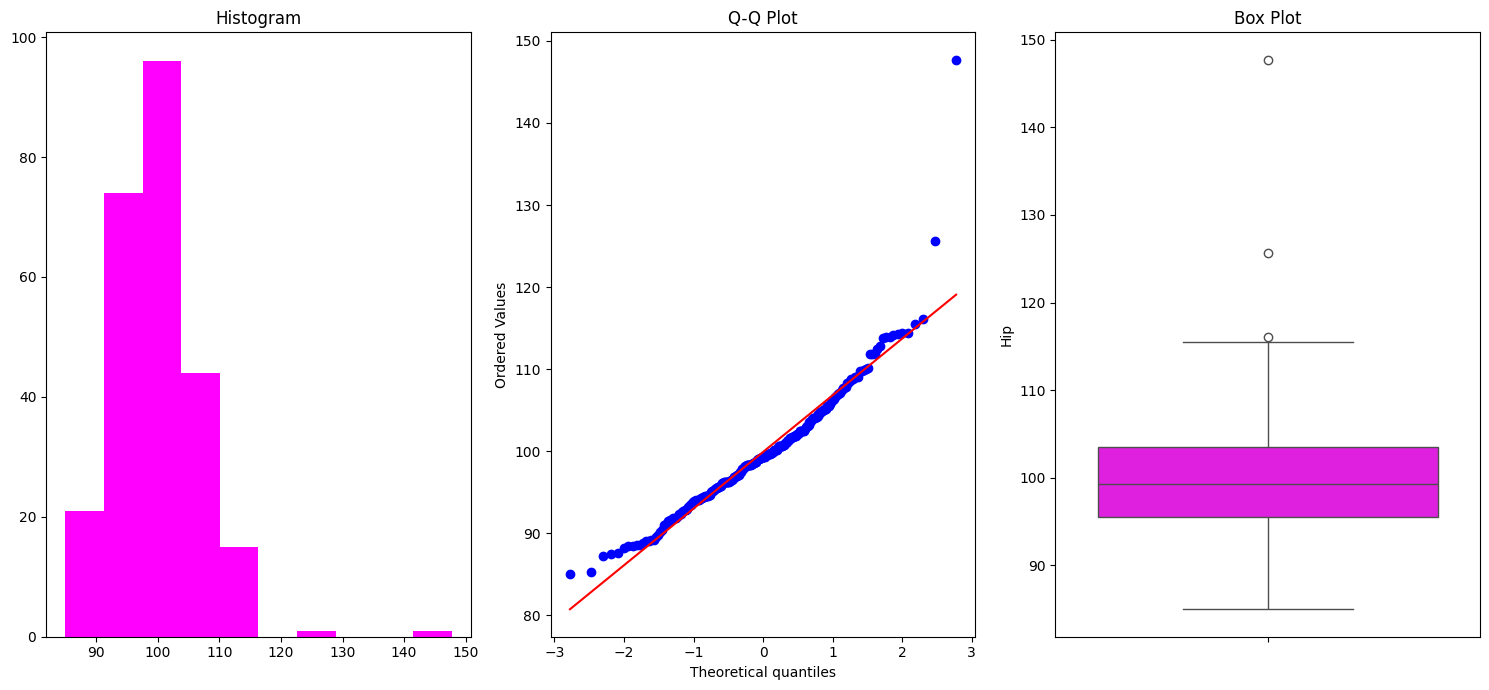

____________________________________________________________________________________________________
Distribution plots for Thigh feature is shown below


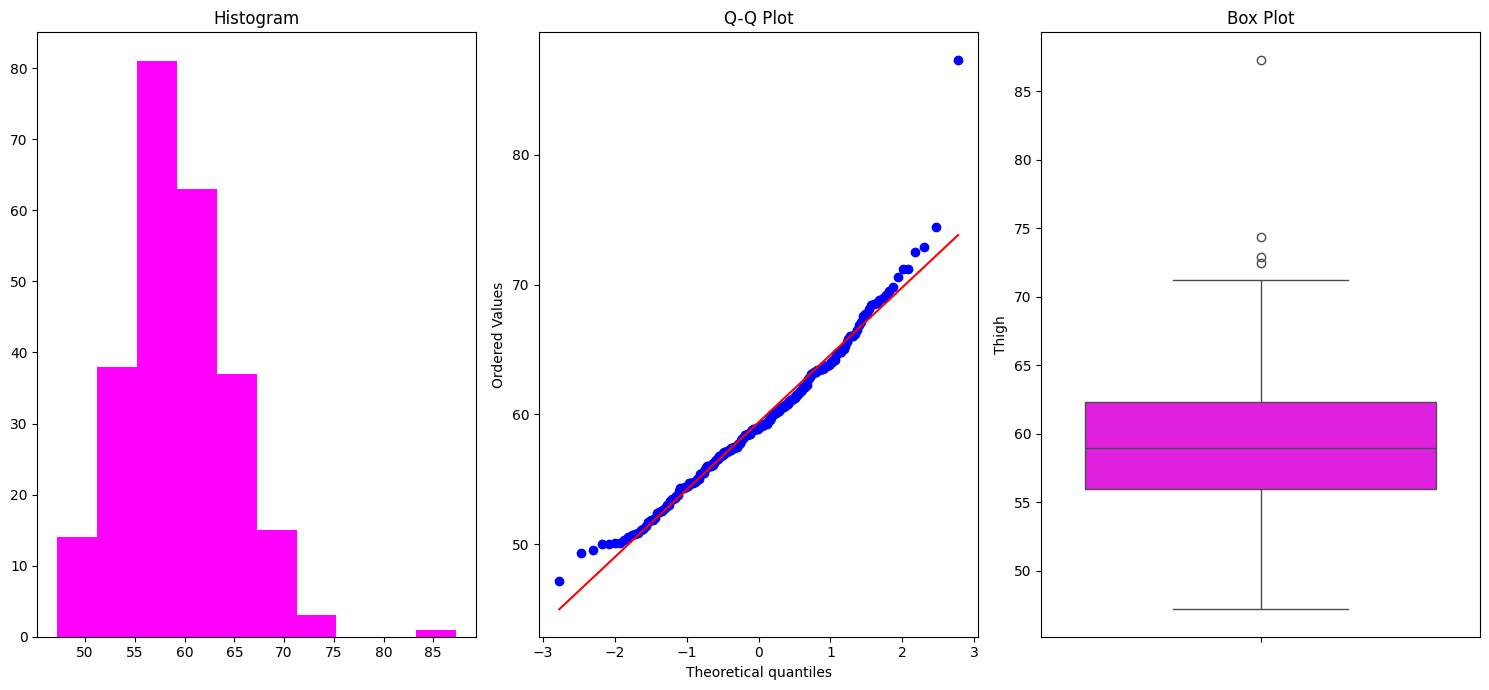

____________________________________________________________________________________________________
Distribution plots for Knee feature is shown below


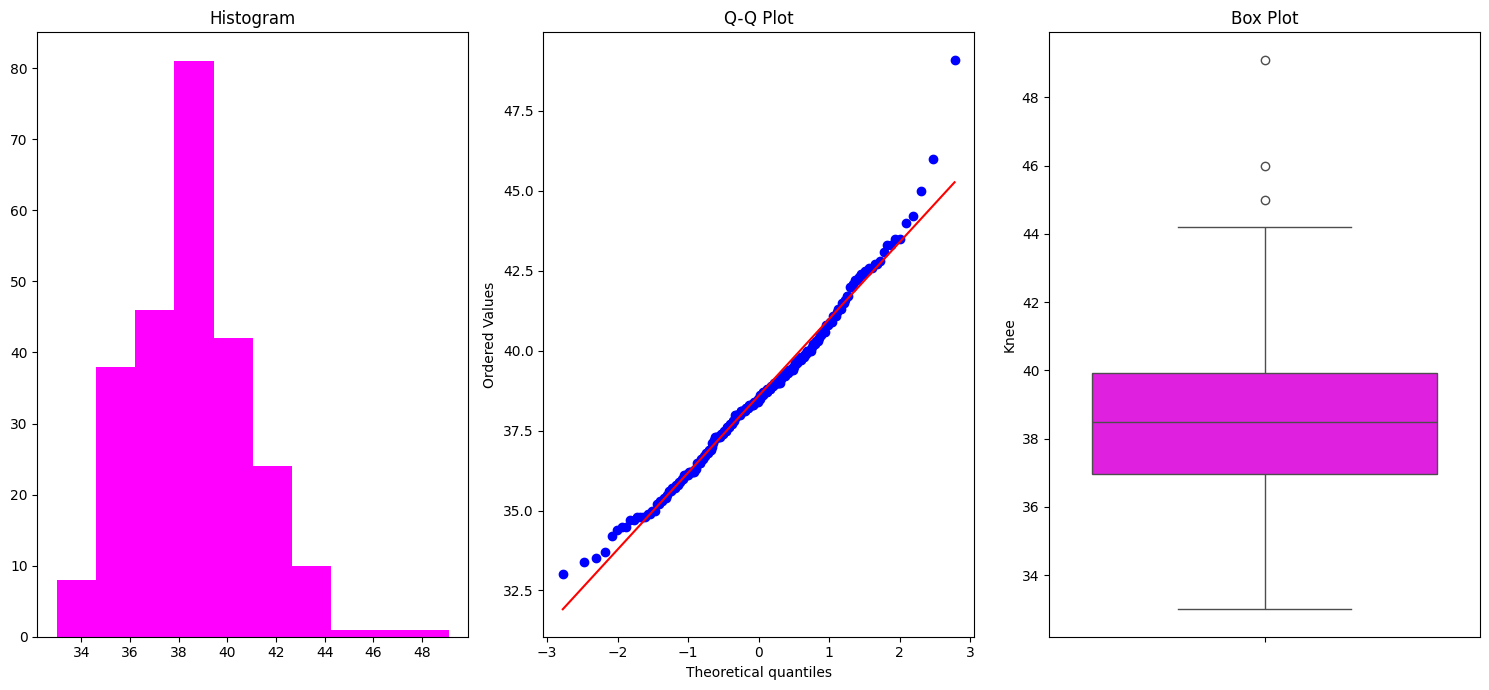

____________________________________________________________________________________________________
Distribution plots for Ankle feature is shown below


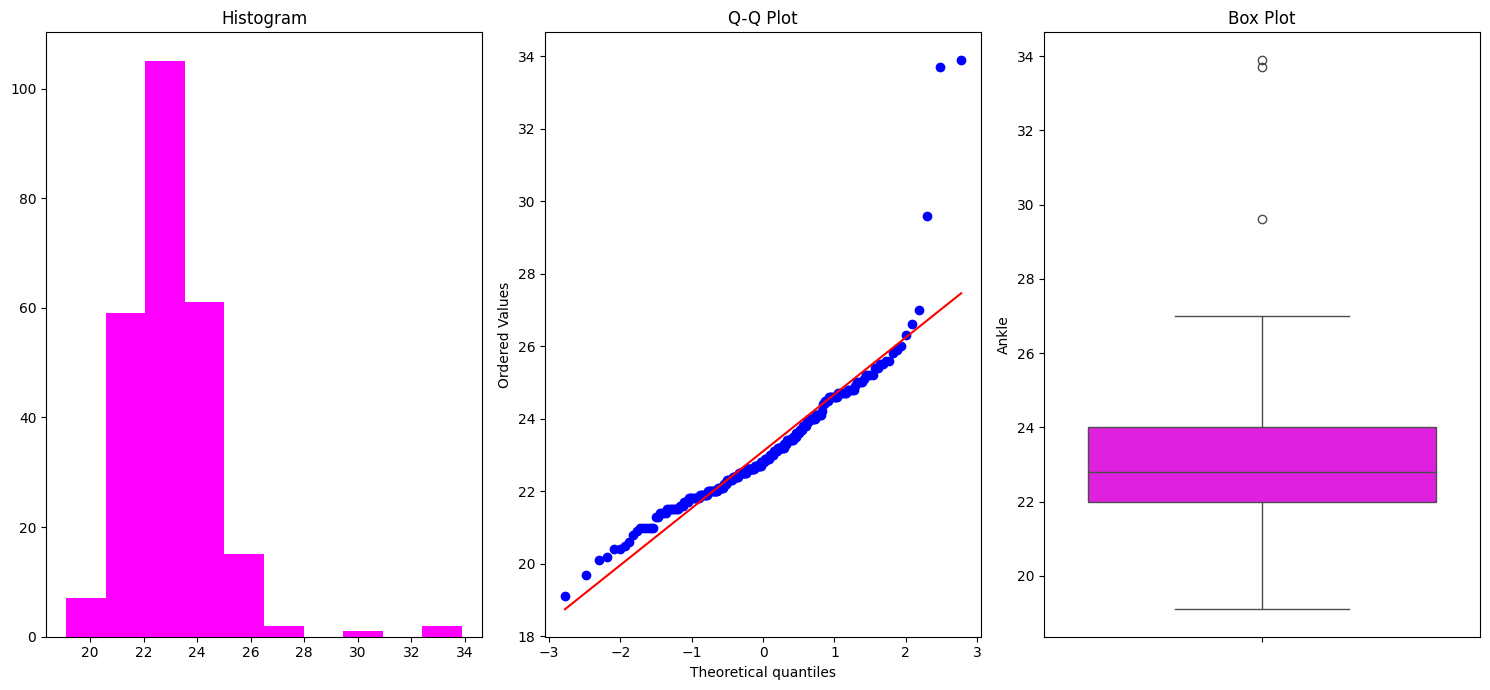

____________________________________________________________________________________________________
Distribution plots for Biceps feature is shown below


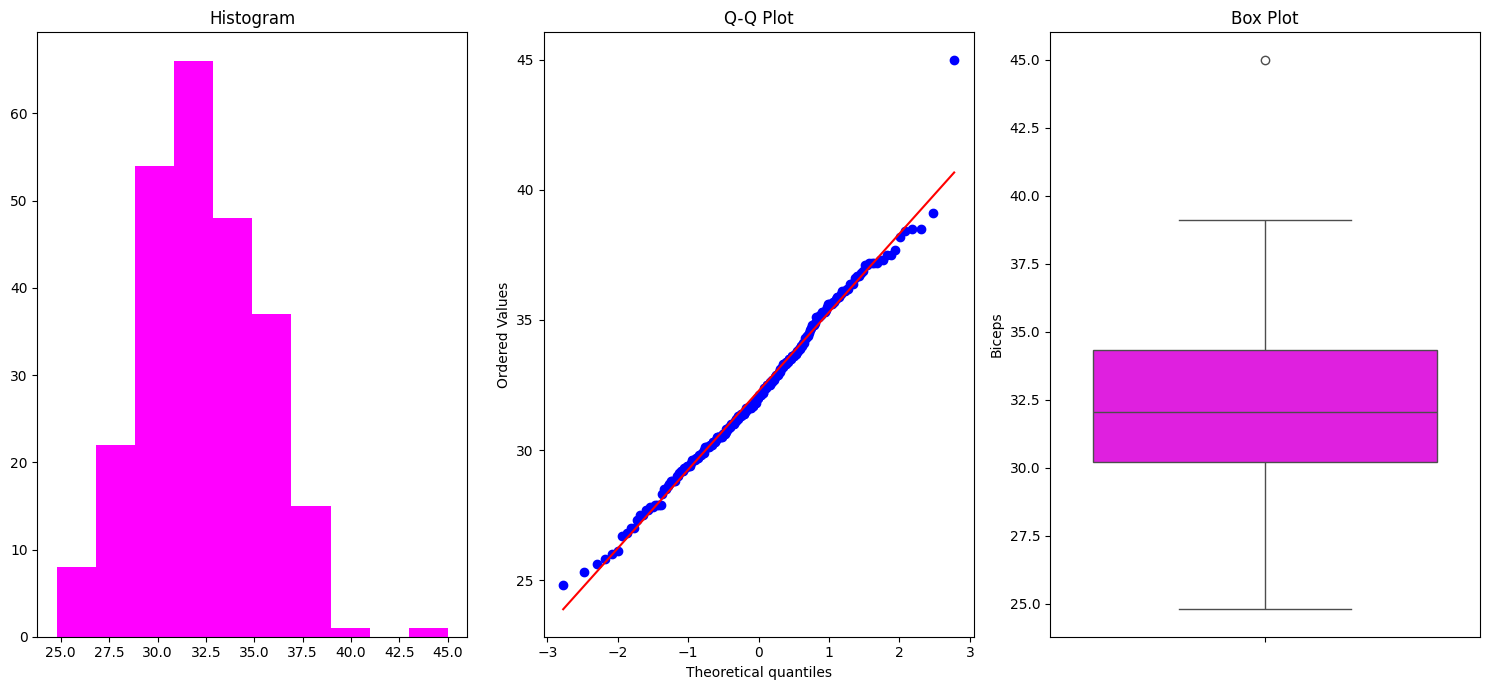

____________________________________________________________________________________________________
Distribution plots for Forearm feature is shown below


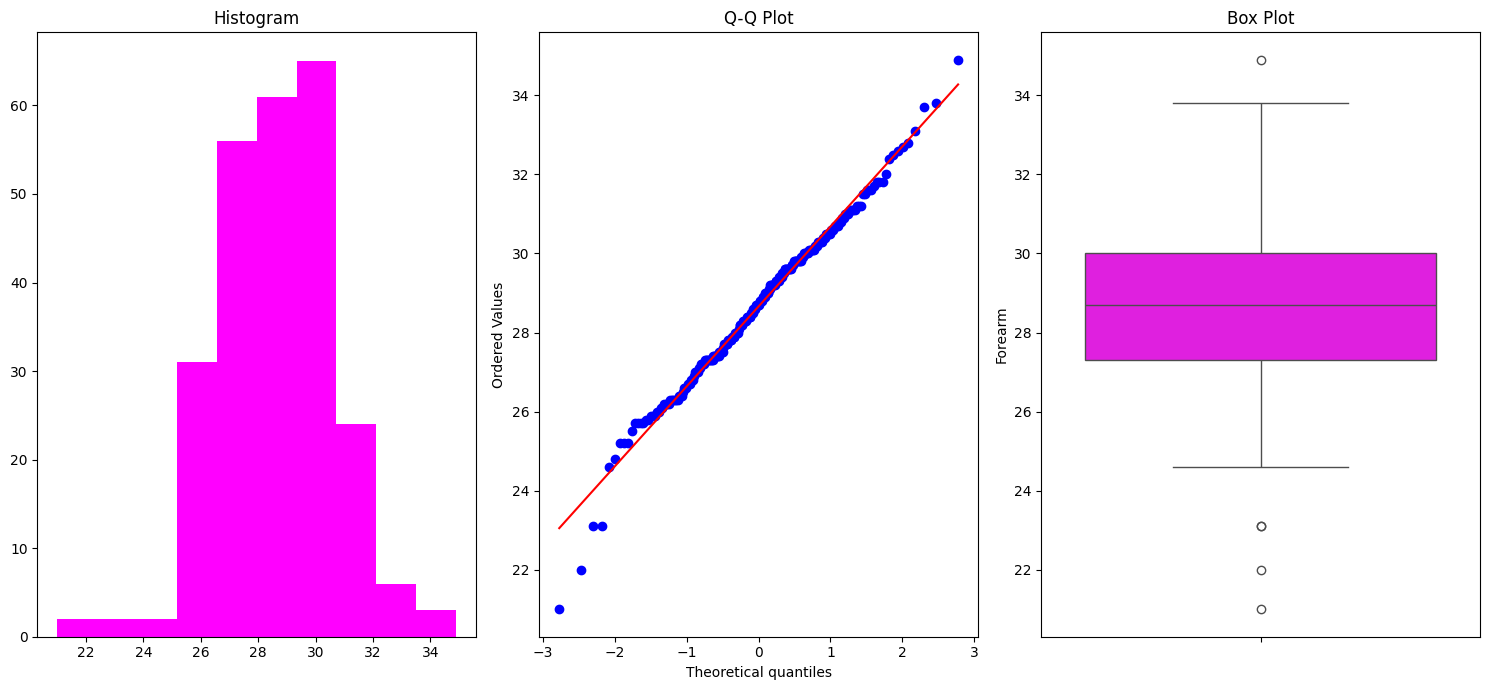

____________________________________________________________________________________________________
Distribution plots for Wrist feature is shown below


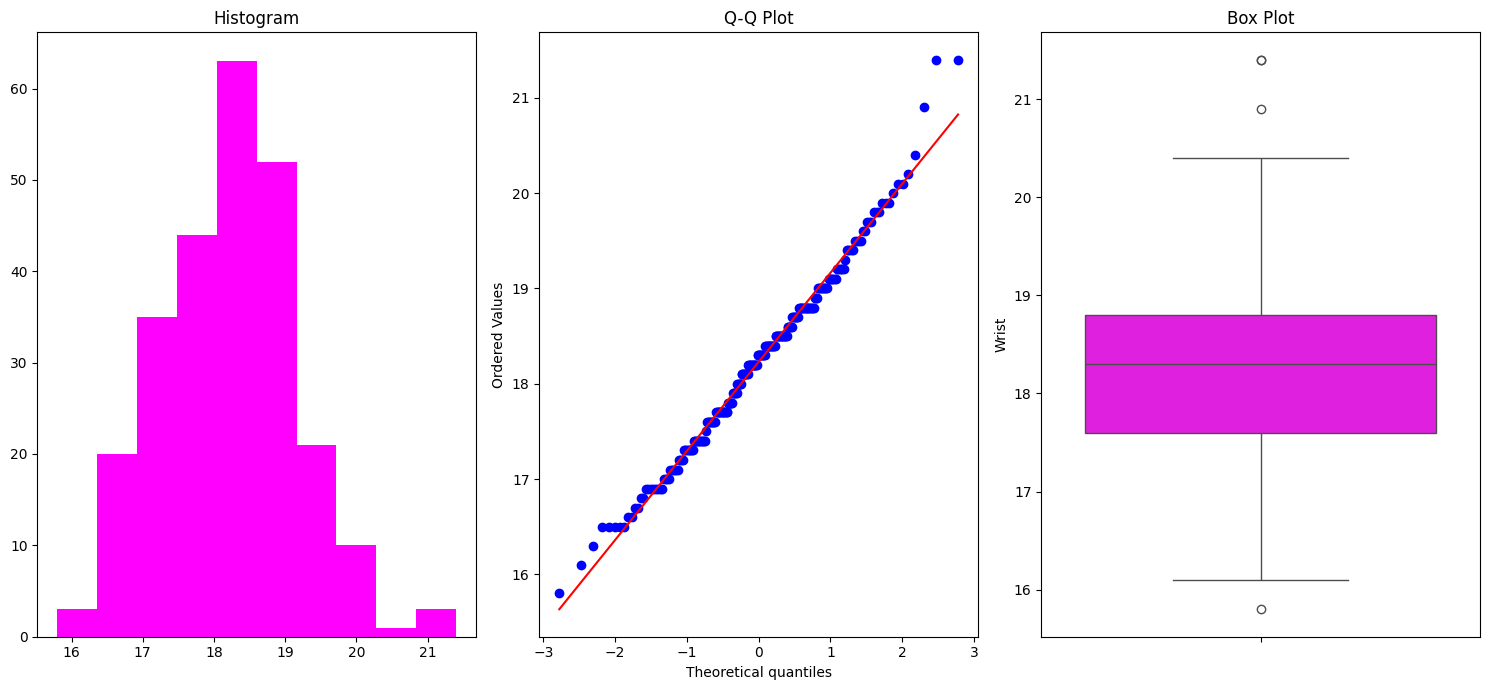

____________________________________________________________________________________________________


In [10]:
# Create distribution plots for all features
for i in range(len(cols)):
    print(f'Distribution plots for {cols[i]} feature is shown below')
    drawplots(df, cols[i])
    print("_"*100)

In [11]:
# Prepare the data for modeling
data = df.copy()
test = data['BodyFat']
train = data.drop('BodyFat', axis=1)

In [12]:
# Feature importance using ExtraTreesRegressor
er = ExtraTreesRegressor()
er.fit(train, test)

ExtraTreesRegressor()

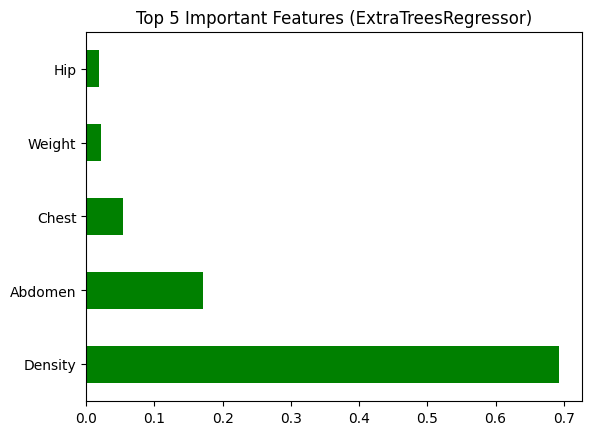

In [13]:
# Plot feature importance
series = pd.Series(er.feature_importances_, index=train.columns)
series.nlargest(5).plot(kind='barh', color='green')
plt.title("Top 5 Important Features (ExtraTreesRegressor)")
plt.show()

In [14]:
# Feature importance using mutual_info_regression
from sklearn.feature_selection import mutual_info_regression
mr = mutual_info_regression(train, test)

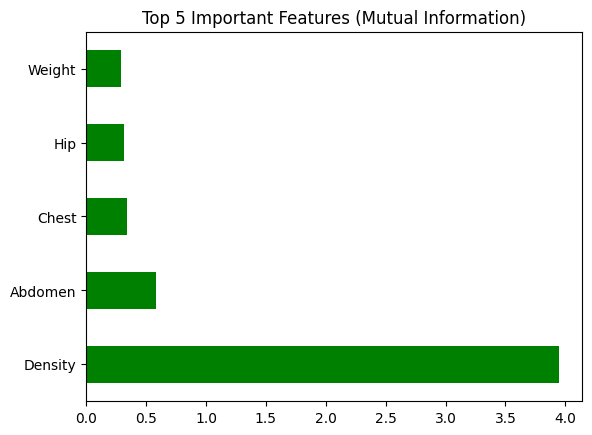

In [15]:
# Plot mutual information scores
plotdata = pd.Series(mr, index=train.columns)
plotdata.nlargest(5).plot(kind='barh', color='green')
plt.title("Top 5 Important Features (Mutual Information)")
plt.show()

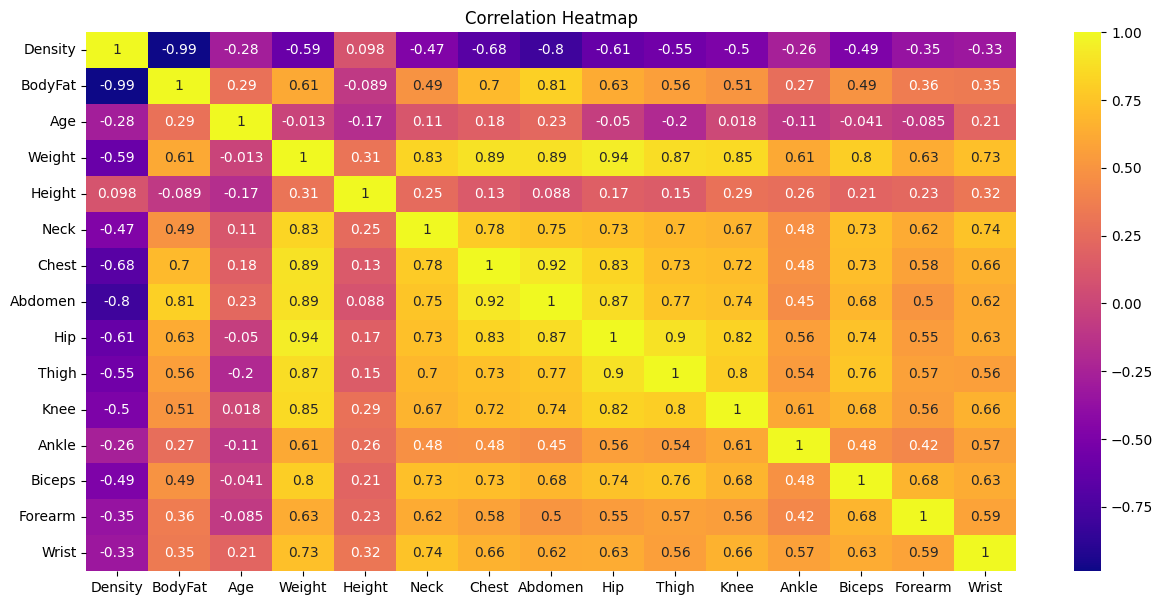

In [16]:
# Correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Function to identify highly correlated features
def correlation(df, threshold):
    colcor = set()
    cormat = df.corr()
    for i in range(len(cormat)):
        for j in range(i):
            if abs(cormat.iloc[i][j] > threshold):
                colname = cormat.columns[i]
                colcor.add(colname)
    return colcor

In [18]:
# Identify highly correlated features
highly_correlated = correlation(train, threshold=0.85)
print("Highly correlated features:", highly_correlated)

Highly correlated features: {'Chest', 'Abdomen', 'Knee', 'Hip', 'Thigh'}


<ipython-input-17-4e03a9a60e21>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(cormat.iloc[i][j] > threshold):


In [19]:
# Calculate Variance Inflation Factor (VIF)
temp = data[list(data.columns)]
info = pd.DataFrame()
info['vif'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
info['col'] = temp.columns
print("Variance Inflation Factor:")
print(info)

Variance Inflation Factor:
            vif      col
0   3695.622377  Density
1     33.845429  BodyFat
2     31.376101      Age
3   1238.097164   Weight
4    613.410514   Height
5   1081.965633     Neck
6   1374.457425    Chest
7   1332.624257  Abdomen
8   2933.636131      Hip
9   1017.257501    Thigh
10  1187.890413     Knee
11   356.293529    Ankle
12   419.391664   Biceps
13   454.571766  Forearm
14  1349.973920    Wrist


In [20]:
# Select features for training based on importance
cols1 = list(series.nlargest(5).index)
cols2 = list(plotdata.nlargest(5).index)
print("Top 5 features (ExtraTreesRegressor):", cols1)
print("Top 5 features (Mutual Information):", cols2)

Top 5 features (ExtraTreesRegressor): ['Density', 'Abdomen', 'Chest', 'Weight', 'Hip']
Top 5 features (Mutual Information): ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight']


In [21]:
# Prepare final training data
totrain = train[cols1]
print("Final training data:")
print(totrain.head())

Final training data:
   Density  Abdomen  Chest  Weight    Hip
0   1.0708     85.2   93.1  154.25   94.5
1   1.0853     83.0   93.6  173.25   98.7
2   1.0414     87.9   95.8  154.00   99.2
3   1.0751     86.4  101.8  184.75  101.2
4   1.0340    100.0   97.3  184.25  101.9


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(totrain, test, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (201, 5)
Testing set shape: (51, 5)


In [23]:
# Decision Tree Regressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

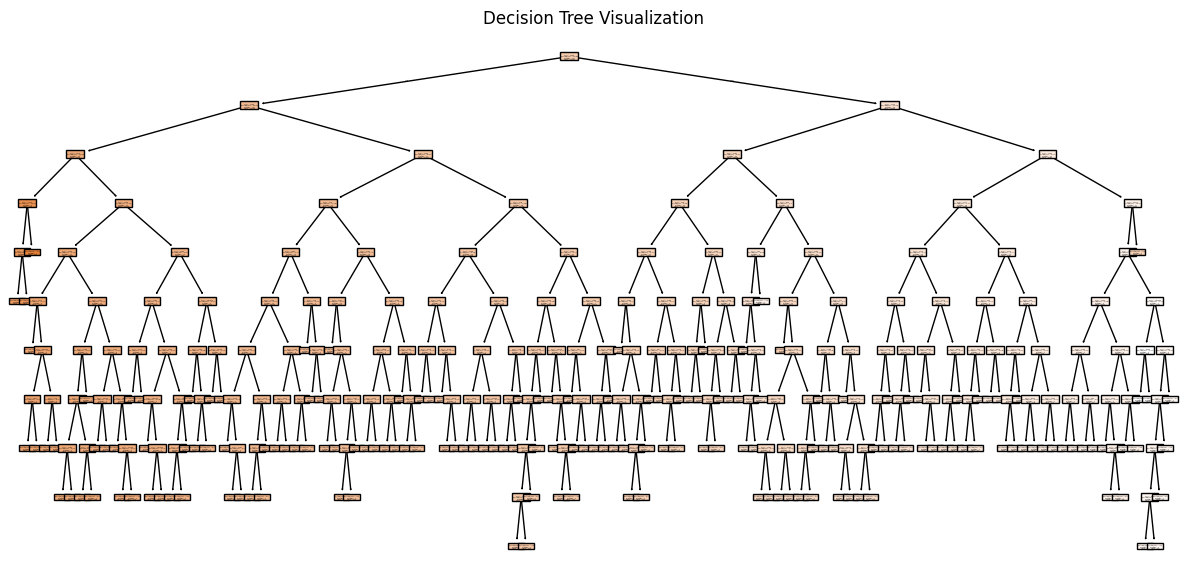

In [27]:
# Plot the decision tree
plt.figure(figsize=(15,7))
tree.plot_tree(reg, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [28]:
# Cost complexity pruning
patch = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = patch.ccp_alphas

In [29]:
# Train decision trees with different alpha values
alphalist = []
for i in range(len(ccp_alphas)):
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alphas[i])
    reg.fit(X_train, y_train)
    alphalist.append(reg)

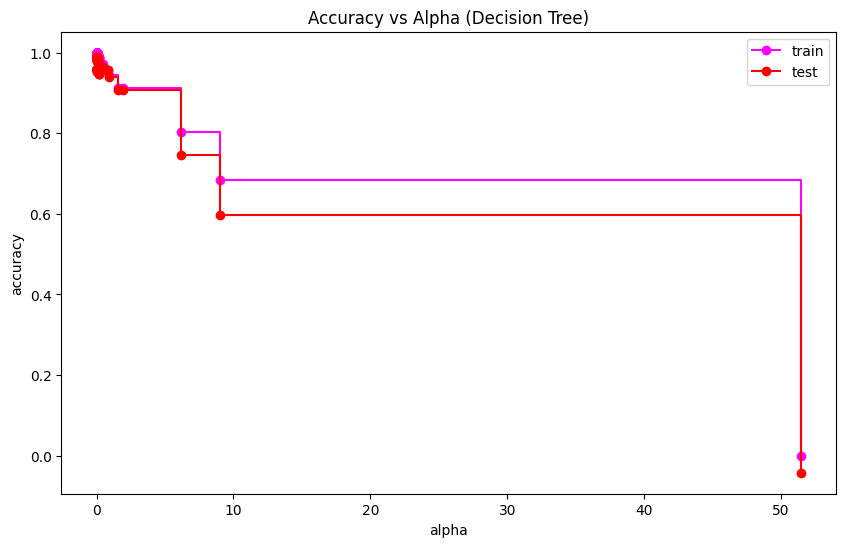

In [30]:
# Plot accuracy vs alpha
train_score = [alphalist[i].score(X_train,y_train) for i in range(len(alphalist))]
test_score = [alphalist[i].score(X_test,y_test) for i in range(len(alphalist))]

plt.figure(figsize=(10,6))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alphas, train_score, label='train', marker='o', color='magenta', drawstyle='steps-post')
plt.plot(ccp_alphas, test_score, label='test', marker='o', color='red', drawstyle='steps-post')
plt.legend()
plt.title("Accuracy vs Alpha (Decision Tree)")
plt.show()

In [31]:
# Train and evaluate different models
models = {
    "Decision Tree": DecisionTreeRegressor(ccp_alpha=1),
    "Random Forest": RandomForestRegressor(n_estimators=1000, ccp_alpha=1),
    "Support Vector Machine": SVR(),
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} : {metrics.r2_score(y_test, y_pred)}')

Decision Tree : 0.9100005946058988
Random Forest : 0.9820626222089797
Support Vector Machine : 0.3200239344118284
Linear Regression : 0.9947182328797893
Lasso : 0.5978198581391978
Ridge : 0.5994172704344525


In [32]:
# Use Linear Regression for final predictions
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions on the entire dataset
totrainlist = np.array(totrain)
predicted = []
for i in range(len(totrainlist)):
    predicted.append(lr.predict([totrainlist[i]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

In [37]:
# Add actual and predicted results to the dataset
totrain['Actual Result'] = test
totrain['Predicted Result'] = np.array(predicted)
print("Final dataset with predictions:")
totrain.head()

Final dataset with predictions:


<ipython-input-37-4ef7f62dbd77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totrain['Actual Result'] = test
<ipython-input-37-4ef7f62dbd77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totrain['Predicted Result'] = np.array(predicted)


,Density,Abdomen,Chest,Weight,Hip,Actual Result,Predicted Result
0,1.0708,85.2,93.1,154.25,94.5,12.3,12.527541
1,1.0853,83.0,93.6,173.25,98.7,6.1,6.473730
2,1.0414,87.9,95.8,154.00,99.2,25.3,24.603122
3,1.0751,86.4,101.8,184.75,101.2,10.4,10.976484
4,1.0340,100.0,97.3,184.25,101.9,28.7,28.174873


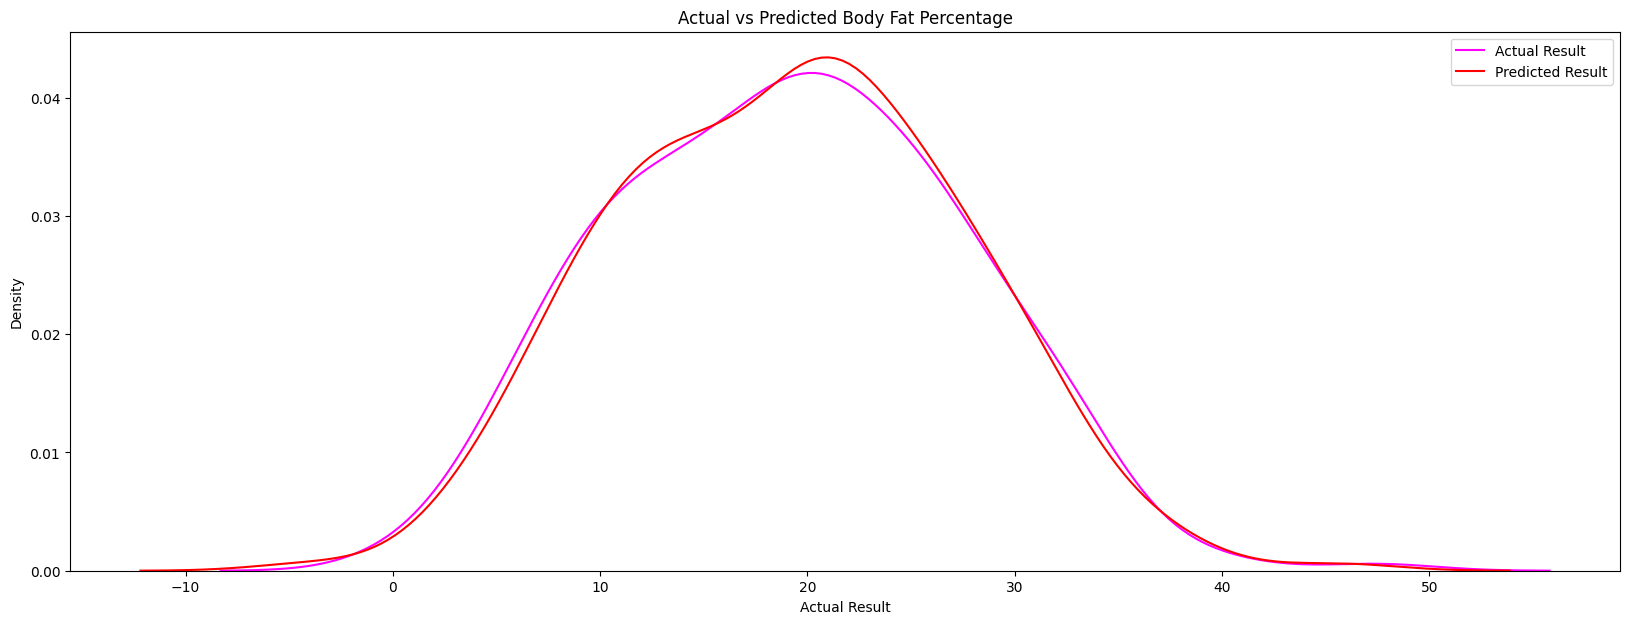

In [35]:
# Plot actual vs predicted results
plt.figure(figsize=(20, 7))
sns.kdeplot(totrain['Actual Result'], color='magenta', label='Actual Result')
sns.kdeplot(totrain['Predicted Result'], color='red', label='Predicted Result')
plt.legend()
plt.title("Actual vs Predicted Body Fat Percentage")
plt.show()

In [36]:
# Save the trained Linear Regression model
joblib.dump(lr, '/content/drive/MyDrive/ML/Body Fat Estimator/lr.joblib')
print("Model saved successfully.")

Model saved successfully.
